In [2]:
import pandas as pd
import numpy as np
  
# reading the csv file
rawInvesDF = pd.read_csv("PUBFIN_20220422-101656.csv",  encoding='cp932')
# unrecognized value change to "0"
rawInvesDF = rawInvesDF.replace('..',0)
rawInvesDF['Value'] = rawInvesDF['Value'].astype(float)
#rawInvesDF.dtypes
rawInvesDF.dtypes

Country/area     object
Technology       object
Year              int64
Value           float64
dtype: object

In [3]:
rawInvesDF['Value'].unique()

array([0.0000e+00, 1.0000e-01, 2.6000e-01, ..., 1.7780e+01, 3.1876e+02,
       5.5700e+00])

In [4]:
rawInvesDF['Technology'].unique()

array(['Solar photovoltaic', 'Solar thermal energy',
       'Onshore wind energy', 'Offshore wind energy',
       'Renewable hydropower', 'Pumped storage', 'Marine energy',
       'Solid biofuels', 'Renewable municipal waste', 'Liquid biofuels',
       'Biogas', 'Geothermal energy', 'Multiple renewables*'],
      dtype=object)

In [8]:
rawInvesDF['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [9]:
rawInvesDF

Country/area            Technology  Year  Value
0      Afghanistan    Solar photovoltaic  2000   0.00
1      Afghanistan    Solar photovoltaic  2001   0.10
2      Afghanistan    Solar photovoltaic  2002   0.00
3      Afghanistan    Solar photovoltaic  2003   0.00
4      Afghanistan    Solar photovoltaic  2004   0.00
...            ...                   ...   ...    ...
51735     Zimbabwe  Multiple renewables*  2015   0.00
51736     Zimbabwe  Multiple renewables*  2016   0.01
51737     Zimbabwe  Multiple renewables*  2017   5.57
51738     Zimbabwe  Multiple renewables*  2018   0.01
51739     Zimbabwe  Multiple renewables*  2019   0.02

[51740 rows x 4 columns]

In [5]:
totalInvsRenewData = pd.DataFrame(columns=['Country','Year','TotalInvestment_Millions(USD)'])
yearList = rawInvesDF['Year'].unique()
countryArray = rawInvesDF['Country/area'].unique()
# Using for loop
for country in countryArray:
    for year in yearList:
        tempDF = rawInvesDF[(rawInvesDF['Country/area'] == country) & (rawInvesDF['Year'] == year)]
        totalInvsRenewData = totalInvsRenewData.append({'Country': country, 'Year': year, 'TotalInvestment_Millions(USD)': (tempDF['Value'].sum())}, ignore_index=True)
totalInvsRenewData

Country  Year  TotalInvestment_Millions(USD)
0     Afghanistan  2000                           0.02
1     Afghanistan  2001                           0.13
2     Afghanistan  2002                           3.95
3     Afghanistan  2003                          25.97
4     Afghanistan  2004                           0.00
...           ...   ...                            ...
3975     Zimbabwe  2015                           0.00
3976     Zimbabwe  2016                           0.03
3977     Zimbabwe  2017                           5.58
3978     Zimbabwe  2018                           0.01
3979     Zimbabwe  2019                           0.25

[3980 rows x 3 columns]

In [33]:
YearSum=totalInvsRenewData.groupby('Year')['TotalInvestment_Millions(USD)'].agg('sum').reset_index()
YearSum

Year  TotalInvestment_Millions(USD)
0   2000                        1425.27
1   2001                        2010.53
2   2002                        1353.53
3   2003                        3111.01
4   2004                        2131.23
5   2005                        2151.71
6   2006                        3304.95
7   2007                        4325.76
8   2008                        3010.32
9   2009                       20110.21
10  2010                       19274.40
11  2011                       21366.91
12  2012                       24667.16
13  2013                       20427.35
14  2014                       24267.36
15  2015                       17812.93
16  2016                       23545.50
17  2017                       29202.65
18  2018                       17269.37
19  2019                       13096.31

In [34]:
import math
import numpy as np
from sklearn import preprocessing, svm
print(YearSum.shape)

# Separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.1 * len(YearSum)))

# Separating the label here, we want to predict the TotalInvestment_Millions(USD)
YearSum['label'] = YearSum['TotalInvestment_Millions(USD)'].shift(-forecast_out)

X = np.array(YearSum.drop(['label'], 1))# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]# Separate label and identify it as y
y = np.array(YearSum['label'])
y = y[:-forecast_out]
print('Dimension of X',X.shape)
print('Dimension of y',y.shape)
print(forecast_out)


(20, 2)
Dimension of X (18, 2)
Dimension of y (18,)
2


C:\Users\A\AppData\Local\Temp/ipykernel_4592/2319595473.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(YearSum.drop(['label'], 1))# Scale the X so that everyone can have the same distribution for linear regression


In [35]:
from sklearn.model_selection import train_test_split
# Separation of training and testing of model by cross validation train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Linear regression
reEnLinearReg = LinearRegression(n_jobs=-1)
reEnLinearReg.fit(X_train, y_train)

# KNN Regression
reKnn = KNeighborsRegressor(n_neighbors=2)
reKnn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [27]:
confidenceliReg = reEnLinearReg.score(X_test, y_test)
confidenceknn = reKnn.score(X_test, y_test)
print("The LR regression confidence is ",confidenceliReg)
print("The knn regression confidence is ",confidenceknn)

The LR regression confidence is  0.7384642657573992
The knn regression confidence is  0.9889090692908777


In [28]:
# Printing the forecast
forecast_set = reEnLinearReg.predict(X_lately)
print(forecast_set, forecast_out)
forecast_set

[26601.81081476 27953.18705579] 2


array([26601.81081476, 27953.18705579])

In [44]:
last_date = YearSum.iloc[-1].name
last_unix = last_date
next_unix = last_unix + 1
for i in forecast_set:
    next_date = next_unix
    next_unix += 1
    YearSum.loc[next_date] = [np.nan for _ in range(len(YearSum.columns)-1)]+[i]

YearSum


Year  TotalInvestment_Millions(USD)         label
0   2000.0                        1425.27   1353.530000
1   2001.0                        2010.53   3111.010000
2   2002.0                        1353.53   2131.230000
3   2003.0                        3111.01   2151.710000
4   2004.0                        2131.23   3304.950000
5   2005.0                        2151.71   4325.760000
6   2006.0                        3304.95   3010.320000
7   2007.0                        4325.76  20110.210000
8   2008.0                        3010.32  19274.400000
9   2009.0                       20110.21  21366.910000
10  2010.0                       19274.40  24667.160000
11  2011.0                       21366.91  20427.350000
12  2012.0                       24667.16  24267.360000
13  2013.0                       20427.35  17812.930000
14  2014.0                       24267.36  23545.500000
15  2015.0                       17812.93  29202.650000
16  2016.0                       23545.50  17269.370000
17  2017.0                       29202.65  13096.310000
18  2018.0                       17269.37           NaN
19  2019.0                       13096.31           NaN
20     NaN                            NaN  26601.810815
21     NaN                            NaN  27953.187056

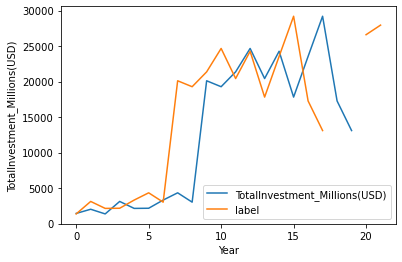

In [46]:
import matplotlib.pyplot as plt
YearSum['TotalInvestment_Millions(USD)'].plot()
YearSum['label'].plot()
plt.legend(loc=4)
plt.xlabel('Year')
plt.ylabel('TotalInvestment_Millions(USD)')
plt.show()

In [23]:
CountrySum=totalInvsRenewData.groupby('Country')['TotalInvestment_Millions(USD)'].agg('sum')
CountrySum.to_csv("worldsumm.csv")
CountrySum

Country
Afghanistan                            626.40
Albania                                472.67
Algeria                                  8.08
Angola                                  95.25
Anguilla                                 0.05
                                       ...   
Venezuela (Bolivarian Republic of)    2441.84
Viet Nam                              2395.48
Yemen                                  169.55
Zambia                                3198.71
Zimbabwe                               344.62
Name: TotalInvestment_Millions(USD), Length: 199, dtype: float64

In [26]:
df_countrysum = pd.read_csv("worldsumm.csv")
countrysum = df_countrysum.sort_values(by=["TotalInvestment_Millions(USD)"], ascending=False).head(10)
countrysum

Country  \
21                                              Brazil   
77                                               India   
134                                           Pakistan   
187  United Kingdom of Great Britain and Northern I...   
123                                            Nigeria   
91                    Lao People's Democratic Republic   
57                                            Ethiopia   
181                                             Turkey   
78                                           Indonesia   
112                                            Morocco   

     TotalInvestment_Millions(USD)  
21                        44875.97  
77                        13640.67  
134                        9380.90  
187                        9034.65  
123                        7637.76  
91                         7216.64  
57                         7080.95  
181                        6850.98  
78                         5784.89  
112                        5485.19

In [27]:
import math
import numpy as np
from sklearn import preprocessing, svm
print(countrysum.shape)

# Separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.1 * len(countrysum)))

# Separating the label here, we want to predict the TotalInvestment_Millions(USD)
countrysum['label'] = countrysum['TotalInvestment_Millions(USD)'].shift(-forecast_out)

#worldReEnergyGenData['label'] = worldReEnergyGenData['CO2_Emission_Prevented_MT']
X = np.array(countrysum.drop(['label'], 1))# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]# Separate label and identify it as y
y = np.array(countrysum['label'])
y = y[:-forecast_out]
print('Dimension of X',X.shape)
print('Dimension of y',y.shape)
print(forecast_out)


(10, 2)


C:\Users\A\AppData\Local\Temp/ipykernel_9832/3507052049.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(countrysum.drop(['label'], 1))# Scale the X so that everyone can have the same distribution for linear regression


ValueError: could not convert string to float: 'Brazil'